In [52]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD




In [80]:
df = pdr.get_data_yahoo('spy')
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,261.721741,258.909833,260.383037,260.427786,9.090985e+07,248.876453
std,39.566278,39.025518,39.345288,39.281386,4.960579e+07,43.942079
min,184.100006,181.020004,182.339996,182.860001,2.027000e+07,166.733185
25%,226.734997,225.379997,226.255001,226.174995,5.867960e+07,210.312126
50%,267.184998,263.309998,265.500000,265.235001,7.721135e+07,253.814880
75%,290.152496,287.347488,289.165009,288.735008,1.049860e+08,280.429771
max,358.750000,353.429993,355.869995,357.700012,3.922207e+08,356.273865


In [56]:
df = df.dropna(axis=1)

In [57]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [65]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,dayOfWeek,numberOfDay,dayOfYear
Date,,,,,,,,,
2015-09-30,191.830002,189.440002,190.369995,191.630005,163452000.0,173.696030,2,30,273
2015-10-01,192.490005,189.820007,192.080002,192.130005,131079000.0,174.149231,3,31,274
2015-10-02,195.029999,189.119995,189.770004,195.000000,211003300.0,176.750641,4,31,275
2015-10-05,198.740005,196.330002,196.460007,198.470001,126320800.0,179.895889,0,31,278
2015-10-06,198.979996,197.000000,198.309998,197.789993,110274500.0,179.279541,1,31,279
2015-10-07,199.830002,197.479996,198.899994,199.410004,124307300.0,180.747940,2,31,280
2015-10-08,201.550003,198.589996,198.949997,201.210007,153055200.0,182.379486,3,31,281
2015-10-09,201.899994,200.580002,201.380005,201.330002,107069200.0,182.488266,4,31,282
2015-10-12,201.759995,200.910004,201.419998,201.520004,56395600.0,182.660446,0,31,285


In [81]:
df['dayOfWeek'] = df.index.dayofweek
df['numberOfDay'] = df.index.days_in_month
df['dayOfYear'] = df.index.dayofyear

In [82]:
N_DAY = 1
df['y'] = df['Close'].shift(N_DAY).pct_change(N_DAY)


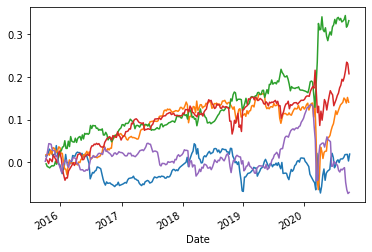

In [68]:
DAYS = [0,1,2,3,4]
for day in DAYS:
    result = df[df['dayOfWeek']==day]['y'].dropna().cumsum()
    result.plot(label = 'day' )

In [69]:
%matplotlib inline

<AxesSubplot:xlabel='dayOfWeek'>

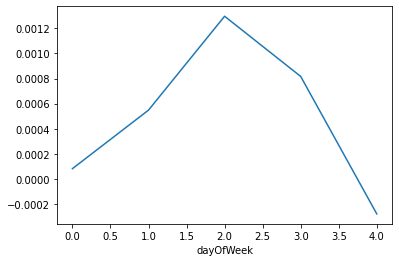

In [70]:
df.groupby('dayOfWeek').y.mean().plot()

In [71]:
# df['dayOfWeek'] = preprocessing.scale(df['dayOfWeek'])
# df['dayOfYear'] = preprocessing.scale(df['dayOfYear'])
# df['numberOfDay'] = preprocessing.scale(df['numberOfDay'])

In [83]:

# df['x1'] = df['Open'] - df['High']
# df['x2'] = df['High'] - df['Low']
# df['x3'] = df['Close'] - df['Open']
df['y'] = df['Close'].shift(-1).pct_change(1)
df['y'] = np.where(df['y'] > 0, 1, 0)
print(df[['dayOfWeek', 'dayOfYear', 'numberOfDay','y']].describe())

         dayOfWeek    dayOfYear  numberOfDay            y
count  1258.000000  1258.000000  1258.000000  1258.000000
mean      2.025437   183.554054    30.473768     0.555644
std       1.400984   104.595173     0.763963     0.497092
min       0.000000     2.000000    28.000000     0.000000
25%       1.000000    93.000000    30.000000     0.000000
50%       2.000000   183.500000    31.000000     1.000000
75%       3.000000   274.000000    31.000000     1.000000
max       4.000000   365.000000    31.000000     1.000000


<AxesSubplot:xlabel='y'>

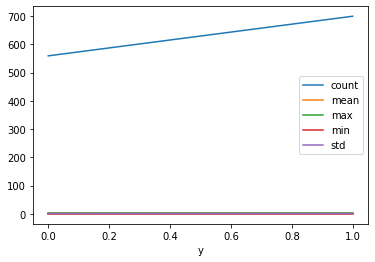

In [88]:
df.groupby('y').dayOfWeek.agg(['count', 'mean' , 'max', 'min', 'std']).plot()

<AxesSubplot:xlabel='y'>

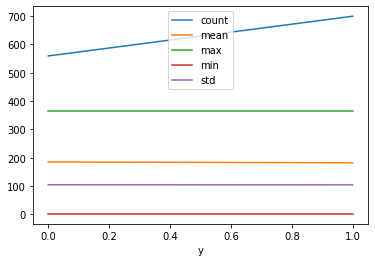

In [89]:
df.groupby('y').dayOfYear.agg(['count', 'mean', 'max', 'min', 'std']).plot()

<AxesSubplot:xlabel='y'>

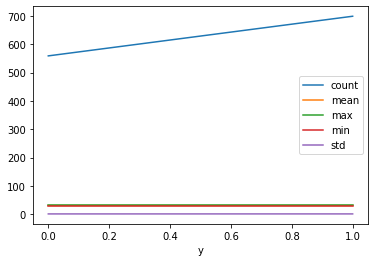

In [90]:
df.groupby('y').numberOfDay.agg(['count', 'mean', 'max', 'min', 'std']).plot()

In [10]:
split = 0.8
df = df.reset_index()
df = df.dropna()
x_train = df[:int(len(df)*split)][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_train = df[:int(len(df)*split)][['y']]
x_test = df[int(len(df)*split):][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_test = df[int(len(df)*split):][['y']]

In [14]:
model = Sequential()
model.add(Dense(9, input_shape = (3,)))
model.add(Dense(3))
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
# model.add(Dense(9, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = SGD(lr=0.001, momentum = 1)
model.compile(optimizer= opt, loss= 'binary_crossentropy', metrics =['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs= 100, batch_size=64, validation_split=0.3)

Epoch 1/100
11/11 [==============================] - 0s 18ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 8/100


In [20]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 5.9970 - accuracy: 0.6071


[5.997047424316406, 0.6071428656578064]

In [21]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history['val_'+metric],'')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

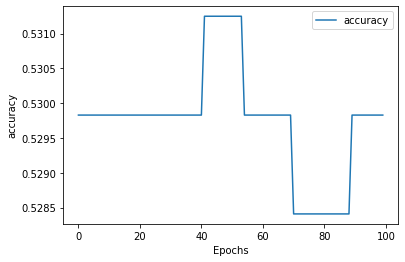

In [22]:
plot_graphs(history, 'accuracy')